In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser 
import missingno as msno

# 1. Load Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\BimaProject\AI\Directing Customers to Subs\Dataset\appdata10.csv")

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


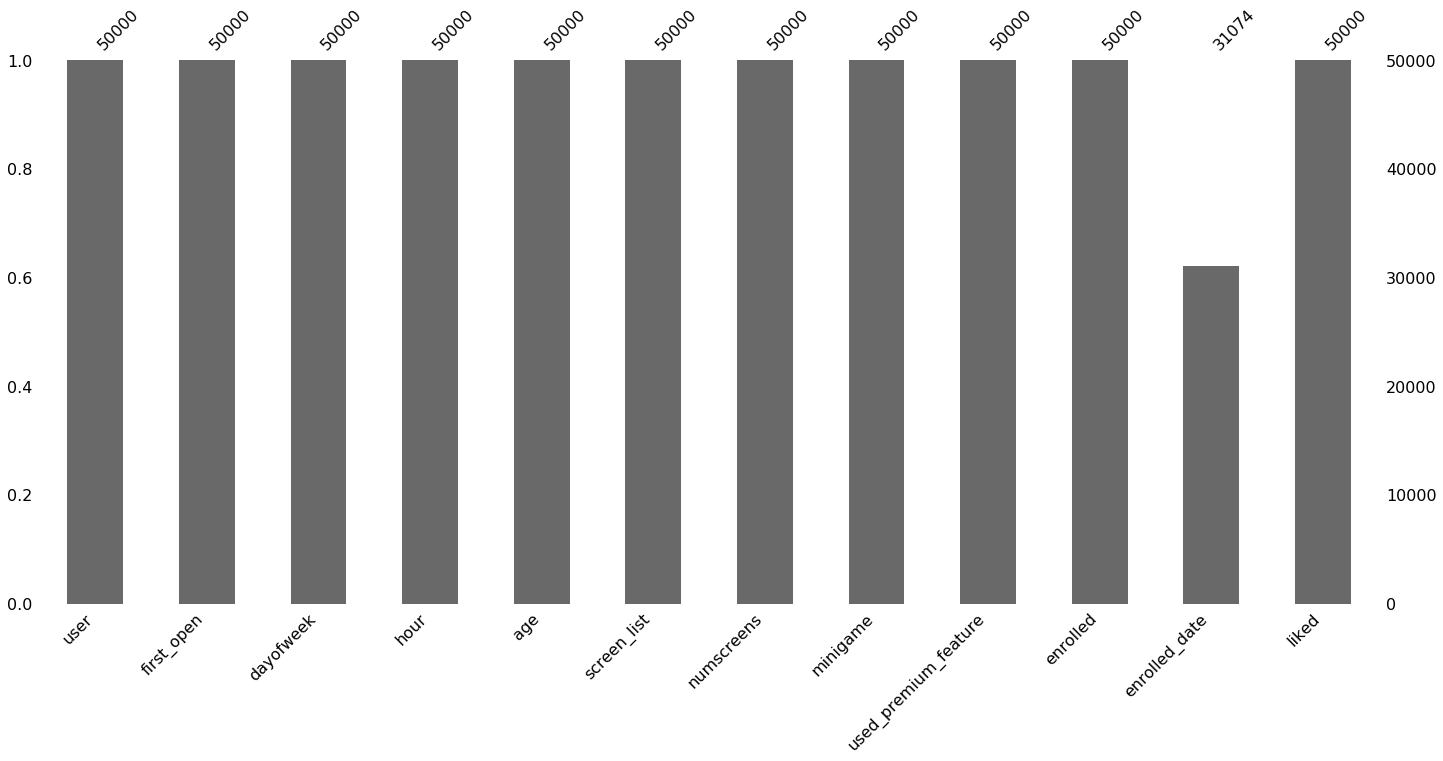

In [6]:
msno.bar(dataset)

In [7]:
dataset['hour'] = dataset.hour.str.slice(0,3).astype(int)

In [8]:
dataset2 = dataset.copy().drop(columns = ['user', 'first_open', 'screen_list','enrolled_date', 'enrolled'], axis = 1)

In [9]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

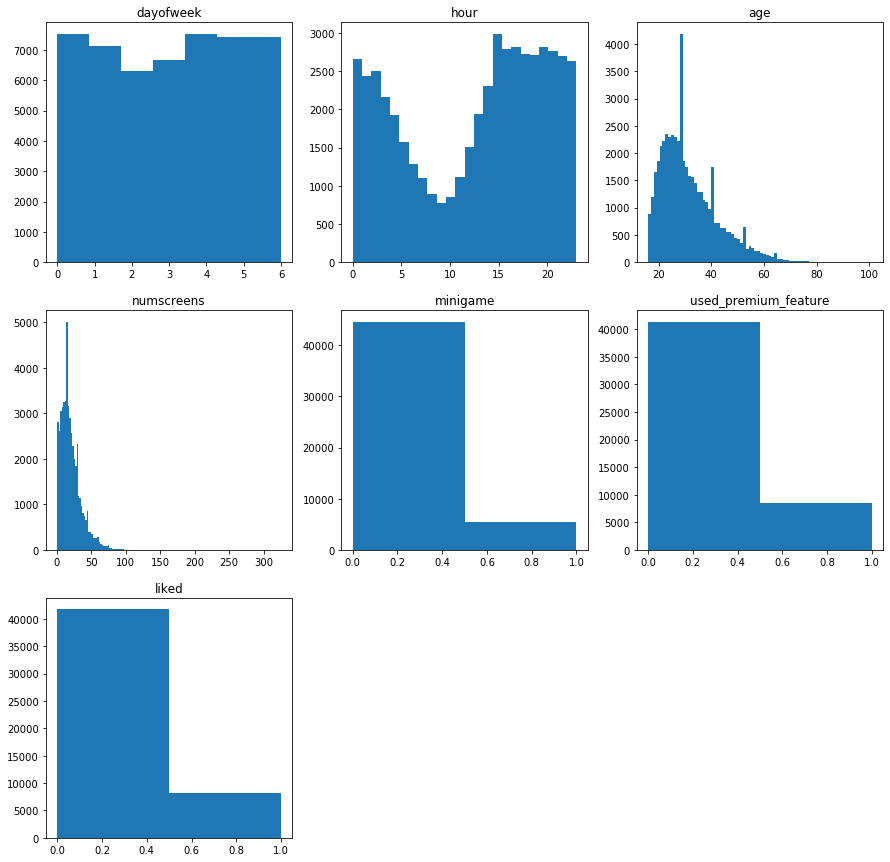

In [10]:
plt.suptitle('Histogram of Columns', fontsize=20)
ax = plt.figure(figsize=(15,15))
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins = vals)

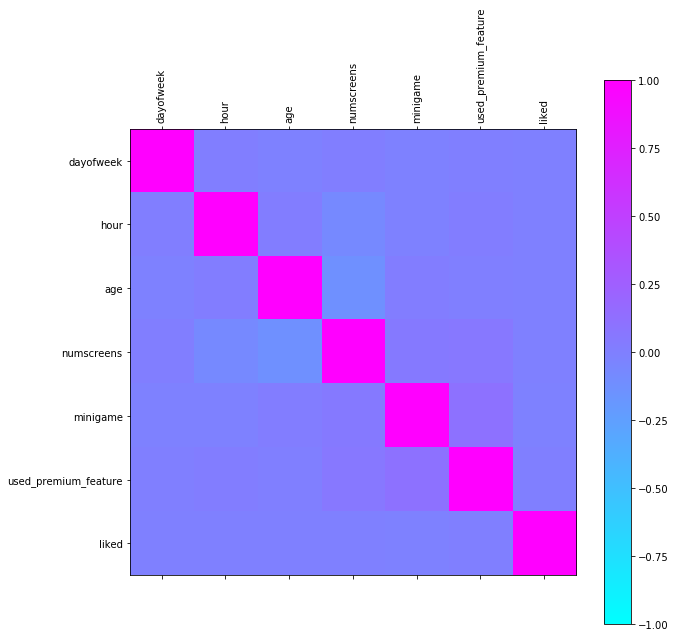

In [11]:
#Auto correlation
corr = dataset2.corr()
fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='cool', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset2.columns)
ax.set_yticklabels(dataset2.columns)
plt.show()

# 2. feature engineering

In [12]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [14]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]

In [15]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [16]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [17]:
top_screens = pd.read_csv(r"C:\Users\aiforesee\Google Drive (bimapriambodowr@gmail.com)\BimaProject\AI\Directing Customers to Subs\Dataset\top_screens.csv").top_screens.values

In [18]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [19]:
dataset["screen_list"] = dataset.screen_list.astype(str)+','

In [20]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.replace(sc+","," ")

In [21]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dataset["other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"], axis =1)

In [23]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,13
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,11
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,3
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,17
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,19


In [24]:
#funnels
savings_screen = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10"]

In [25]:
dataset["SavingCount"] = dataset[savings_screen].sum(axis=1)
dataset = dataset.drop(columns= savings_screen)

In [26]:
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns= cc_screens)

In [27]:
loans_screens = ["Loan",
                 "Loan2",
                 "Loan3",
                 "Loan4"]
dataset["LoansCount"] = dataset[loans_screens].sum(axis=1)
dataset = dataset.drop(columns= loans_screens)

In [28]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,0,13,0,0,2
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,11,0,0,2
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,3,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,17,0,0,2
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,19,0,0,2


dataset.to_excel(r"raw_feature_data.xlsx")

In [29]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Splash', 'RewardsContainer',
       'Credit3', 'Credit1', 'EditProfile', 'Credit2', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingCount', 'CCCount', 'LoansCount'],
      dtype='object')

# 3. MODELING

In [30]:
#library for classification prediction

##linear model
from sklearn.linear_model import LogisticRegression

##Linear and Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Processes
from sklearn.naive_bayes import GaussianNB

#Ensemble methods
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Neural Network
from sklearn.neural_network import MLPClassifier

#feature importance
from xgboost import plot_importance

#library for evaluating the models
from sklearn.metrics import average_precision_score,balanced_accuracy_score, auc,confusion_matrix, cohen_kappa_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, KFold

In [31]:
new_data = dataset

In [32]:
new_data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,0,13,0,0,2
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,11,0,0,2
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,3,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,17,0,0,2
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,19,0,0,2


In [33]:
response = new_data["enrolled"]

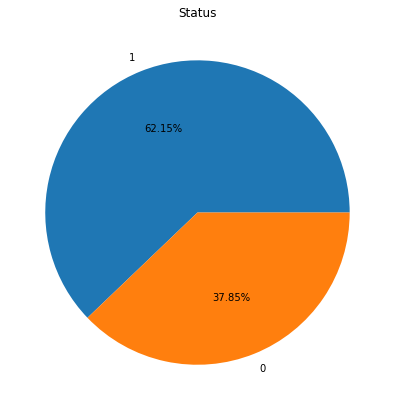

In [34]:
response.value_counts().plot.pie(autopct='%1.2f%%')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Status')
plt.axis('off')
plt.show()

In [35]:
# 1 high probabilty enrolled 
# 0 high probability not enrolled

In [36]:
new_data = new_data.drop(columns=["enrolled","enrolled_date","first_open","user"], axis=1)

In [37]:
#normalisasi data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
new_data2 = pd.DataFrame(sc.fit_transform(new_data))
new_data2.columns = new_data.columns.values
new_data2.index = new_data.index.values
new_data = new_data2

In [39]:
new_data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,Credit3Container,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CCCount,LoansCount
0,-0.014695,-1.419363,-0.807572,-0.387567,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.003454,-0.259709,-0.28914,0.704406
1,1.461700,-1.553808,-0.715007,-0.514723,-0.347635,-0.455805,-0.444528,0.965089,1.550903,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.277838,-0.259709,-0.28914,0.704406
2,-0.998958,0.866198,-0.807572,-1.150505,-0.347635,2.193918,2.249579,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-1.403006,-0.259709,-0.28914,-0.330967
3,0.477437,0.462864,-0.344746,1.201889,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.566038,-0.259709,-0.28914,0.704406
4,-0.998958,0.731753,-0.067050,0.693263,-0.347635,-0.455805,2.249579,-1.036174,1.550903,1.425596,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.847330,-0.259709,-0.28914,0.704406


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(new_data,response,
                                                   test_size=0.3,
                                                   random_state=0)

In [41]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,Credit3Container,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CCCount,LoansCount
17967,-0.014695,-1.419363,-0.437311,2.791345,-0.347635,-0.455805,2.249579,0.965089,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,2.394436,3.297753,-0.28914,0.704406
32391,-0.998958,0.328419,-1.085267,-0.069675,-0.347635,-0.455805,-0.444528,-1.036174,1.550903,1.425596,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.277838,-0.259709,-0.28914,0.704406
9341,-0.998958,0.597309,-0.067050,-0.260410,-0.347635,-0.455805,-0.444528,-1.036174,1.550903,1.425596,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.003454,4.009245,-0.28914,0.704406
7929,-0.014695,1.000643,-0.437311,-0.705458,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.840422,-0.259709,-0.28914,-1.366341
46544,-1.491090,1.000643,-0.252181,-0.896192,2.876581,-0.455805,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.981068,-0.259709,-0.28914,0.704406


In [42]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,Credit3Container,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CCCount,LoansCount
11841,-1.491090,-1.553808,0.858601,0.820420,-0.347635,-0.455805,2.249579,0.965089,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.847330,-0.259709,-0.289140,-1.366341
19602,0.969568,-0.881584,-0.529876,0.566107,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.144100,-0.259709,-0.289140,0.704406
45519,-1.491090,0.328419,0.488340,-0.641879,-0.347635,2.193918,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.418484,-0.259709,-0.289140,0.704406
25747,0.969568,0.866198,-0.992702,-0.514723,-0.347635,-0.455805,2.249579,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.003454,-0.259709,-0.289140,-1.366341
42642,0.969568,-1.553808,-0.159616,0.693263,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.326926,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,1.128622,1.874768,2.942555,-1.366341


In [43]:
X_test.shape

(15000, 52)

In [44]:
#feature importance
#importance numeric variable XGB
XGB = XGBClassifier(random_state = 0)
XGB = XGB.fit(X_train, y_train)
importances=XGB.feature_importances_

indices = np.argsort(importances)[::-1]
selected_XGB = pd.DataFrame({'Variables' : X_train.columns[indices], "Importance":importances[np.argsort(importances)[::-1]]})
cols_XGB = selected_XGB[:]["Variables"]
selected_num_XGB = X_train[cols_XGB]
selected_XGB[:]

,Variables,Importance
0,VerifyPhone,0.316124
1,VerifyMobile,0.087992
2,Credit1,0.073805
3,BankVerification,0.054200
4,Credit3Dashboard,0.048673
5,idscreen,0.041546
6,Alerts,0.039333
7,minigame,0.034693
8,other,0.029950
9,LoansCount,0.028051


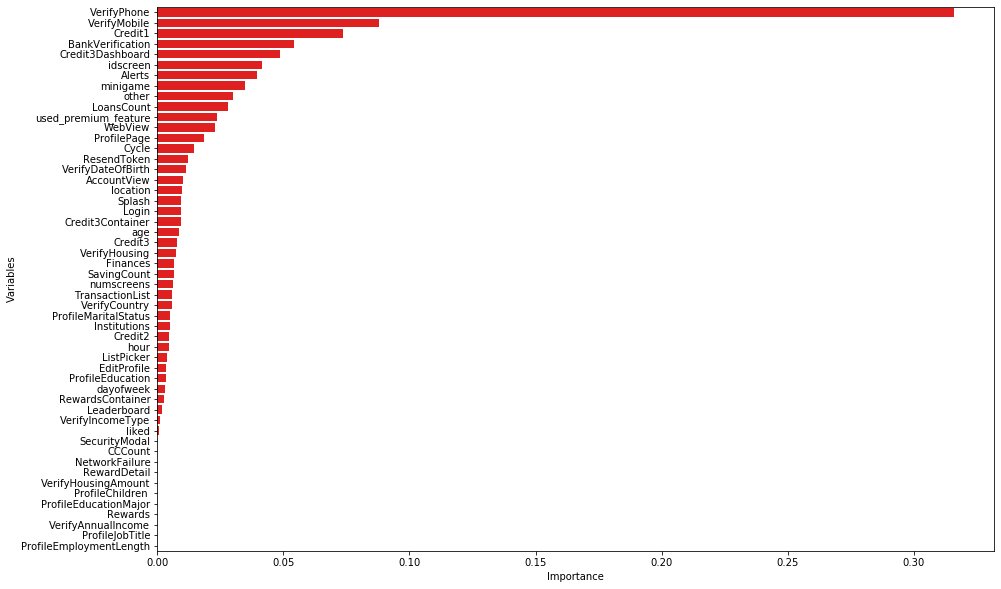

In [45]:
plt.figure(figsize=(15,10))
sn.barplot(x = "Importance", y = "Variables", data = selected_XGB[:], color='red')

In [46]:
X_train.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Splash', 'RewardsContainer', 'Credit3',
       'Credit1', 'EditProfile', 'Credit2', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [47]:
#drop varibale with low ranking
fitur_train = X_train.drop(columns=['SecurityModal','CCCount','NetworkFailure','RewardDetail','VerifyHousingAmount',
                                   'ProfileChildren ','ProfileEducationMajor','Rewards',
                                    'VerifyAnnualIncome','ProfileJobTitle','ProfileEmploymentLength'], axis=1)

fitur_test = X_test.drop(columns=['SecurityModal','CCCount','NetworkFailure','RewardDetail','VerifyHousingAmount',
                                  'ProfileChildren ','ProfileEducationMajor','Rewards','VerifyAnnualIncome',
                                  'ProfileJobTitle','ProfileEmploymentLength'], axis=1)

In [48]:
fitur_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,Credit3Container,...,AccountView,VerifyIncomeType,Login,WebView,ResendToken,TransactionList,ListPicker,other,SavingCount,LoansCount
17967,-0.014695,-1.419363,-0.437311,2.791345,-0.347635,-0.455805,2.249579,0.965089,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,2.394436,3.297753,0.704406
32391,-0.998958,0.328419,-1.085267,-0.069675,-0.347635,-0.455805,-0.444528,-1.036174,1.550903,1.425596,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,-0.277838,-0.259709,0.704406
9341,-0.998958,0.597309,-0.067050,-0.260410,-0.347635,-0.455805,-0.444528,-1.036174,1.550903,1.425596,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,0.003454,4.009245,0.704406
7929,-0.014695,1.000643,-0.437311,-0.705458,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,-0.840422,-0.259709,-1.366341
46544,-1.491090,1.000643,-0.252181,-0.896192,2.876581,-0.455805,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,-0.981068,-0.259709,0.704406


In [49]:
fitur_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,Credit3Container,...,AccountView,VerifyIncomeType,Login,WebView,ResendToken,TransactionList,ListPicker,other,SavingCount,LoansCount
11841,-1.491090,-1.553808,0.858601,0.820420,-0.347635,-0.455805,2.249579,0.965089,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,0.847330,-0.259709,-1.366341
19602,0.969568,-0.881584,-0.529876,0.566107,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,0.144100,-0.259709,0.704406
45519,-1.491090,0.328419,0.488340,-0.641879,-0.347635,2.193918,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,-0.418484,-0.259709,0.704406
25747,0.969568,0.866198,-0.992702,-0.514723,-0.347635,-0.455805,2.249579,-1.036174,-0.644786,-0.701461,...,-0.164091,-0.181113,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,0.003454,-0.259709,-1.366341
42642,0.969568,-1.553808,-0.159616,0.693263,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,-0.701461,...,-0.164091,5.521426,-0.175258,-0.326926,-0.116277,-0.116542,-0.087395,1.128622,1.874768,-1.366341


In [50]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [51]:
model.fit(fitur_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
def evaluate_model_testing(model,fitur_train, y_train, fitur_test, y_test):
    #test
    predY = model.predict(fitur_test)
    probs = model.predict_proba(fitur_test)
    probs = probs[:, 1]
    #train
    probs_train = model.predict_proba(fitur_train)
    probs_train = probs_train[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    #classification report
    print(classification_report(y_test, predY))
    
    print("Accuracy on testing :" + str(accuracy_score(y_test, predY)))
    print("AUC of Precision-Recall Curve on Testing :" + str(auc(recall, precision)))
    print("AUC of ROC on Probability :" + str(roc_auc_score(y_test,probs)))
    print("AUC of ROC on Train:" + str(roc_auc_score(y_train,probs_train)))
    print("Precision Score :" + str(precision_score(y_test, predY, average='weighted')))
    print("F1 Score :" + str(f1_score(y_test, predY, average='weighted')))
    print("Recall Score :" + str(recall_score(y_test, predY, average='weighted')))
    
    #TN EAR EDR
    (tn, fp, fn, tp ) = confusion_matrix(y_test, predY).ravel()
    print("TN :" + str(tn), "\t""FP :" + str(fp), "\t""FN :" + str(fn), "\t""TP :" + str(tp))
    print("EAR "+str((fp+tp)/(fp+tp+tn+fn)))
    print("EDR "+str((fp)/(fp+tp)))
    
    #confusion matrix plot
    conf_mat = confusion_matrix(y_test, predY)
    fig, ax = plt.subplots(figsize=(8,8))
    sn.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      5669
           1       0.81      0.84      0.82      9331

    accuracy                           0.78     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.77      0.78      0.78     15000

Accuracy on testing :0.7766
AUC of Precision-Recall Curve on Testing :0.9090540563882867
AUC of ROC on Probability :0.8540888246026428
AUC of ROC on Train:0.9999994362472893
Precision Score :0.774802314679652
F1 Score :0.7754182375212632
Recall Score :0.7766
TN :3853 	FP :1816 	FN :1535 	TP :7796
EAR 0.6408
EDR 0.1889305035372451


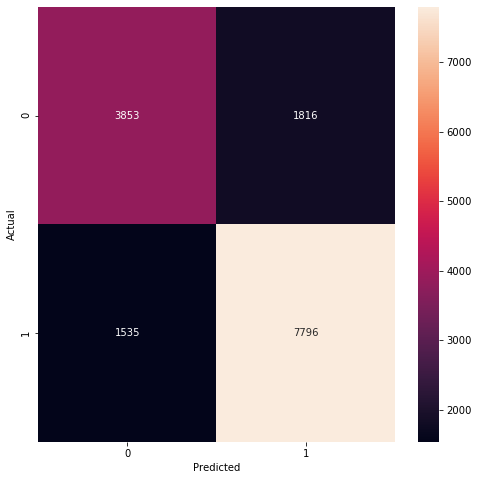

In [53]:
evaluate_model_testing(model, fitur_train, y_train, fitur_test, y_test)

In [54]:
fitur_test.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Splash', 'RewardsContainer', 'Credit3',
       'Credit1', 'EditProfile', 'Credit2', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'ProfileMaritalStatus',
       'ProfileEducation', 'AccountView', 'VerifyIncomeType', 'Login',
       'WebView', 'ResendToken', 'TransactionList', 'ListPicker', 'other',
       'SavingCount', 'LoansCount'],
      dtype='object')

In [56]:
fitur_test.iloc[0].to_dict()

{'dayofweek': -1.4910901000169035,
 'hour': -1.553808010558915,
 'age': 0.8586009626486494,
 'numscreens': 0.8204198088323655,
 'minigame': -0.3476349416844522,
 'used_premium_feature': -0.45580548648856795,
 'liked': 2.249579085208177,
 'location': 0.9650890042663153,
 'Institutions': -0.6447858478090108,
 'Credit3Container': -0.7014608951502748,
 'VerifyPhone': 0.9519528656833033,
 'BankVerification': 1.4592801836232747,
 'VerifyDateOfBirth': 1.0545243606012433,
 'ProfilePage': -0.4332492112995052,
 'VerifyCountry': 1.1675497088029096,
 'Cycle': 1.3193851918366626,
 'idscreen': 1.3910907765406466,
 'Credit3Dashboard': -0.48526598261354337,
 'Splash': 1.9952623703860657,
 'RewardsContainer': -0.30282512572202286,
 'Credit3': -0.9378851664204562,
 'Credit1': -0.4918925897782816,
 'EditProfile': -0.22694183662651343,
 'Credit2': -0.34803233745609496,
 'Finances': -0.287895704204988,
 'Alerts': -0.28211197398864896,
 'Leaderboard': -0.23306327151444278,
 'VerifyMobile': -0.23859177755316